# **Bank-Churn Classification**

<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Muhammad Hasnain</h1>
 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/hasnainkhan0123) 

[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/m.hasnain) 

[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mk0812916@gmail.com)


## `AIM:` We will classifiy the customers who will stay in our bank or leave the bank using deep learning approach.
### Data Description:

* Customer ID: A unique identifier for each customer

* Surname: The customer's surname or last name

* Credit Score: A numerical value representing the customer's credit score

* Geography: The country where the customer resides

* Gender: The customer's gender

* Age: The customer's age.

* Tenure: The number of years the customer has been with the bank

* Balance: The customer's account balance

* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

* HasCrCard: Whether the customer has a credit card

* IsActiveMember: Whether the customer is an active member

* EstimatedSalary: The estimated salary of the customer

* Exited: Whether the customer has churned (Target Variable)



In [50]:
### Importing Libraries
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [51]:
### Importing the data
dir = "Data/"
df_train = pd.read_csv(f"{dir}train.csv")
df_test = pd.read_csv(f"{dir}test.csv")

In [52]:
df_train.shape, df_test.shape

((165034, 14), (110023, 13))

In [53]:
df_train.head().T

,0,1,2,3,4
id,0,1,2,3,4
CustomerId,15674932,15749177,15694510,15741417,15766172
Surname,Okwudilichukwu,Okwudiliolisa,Hsueh,Kao,Chiemenam
CreditScore,668,627,678,581,716
Geography,France,France,France,France,Spain
Gender,Male,Male,Male,Male,Male
Age,33.0,33.0,40.0,34.0,33.0
Tenure,3,1,10,2,5
Balance,0.0,0.0,0.0,148882.54,0.0
NumOfProducts,2,2,2,1,2


In [54]:
df_test.head().T

,0,1,2,3,4
id,165034,165035,165036,165037,165038
CustomerId,15773898,15782418,15807120,15808905,15607314
Surname,Lucchese,Nott,K?,O'Donnell,Higgins
CreditScore,586,683,656,681,752
Geography,France,France,France,France,Germany
Gender,Female,Female,Female,Male,Male
Age,23.0,46.0,34.0,36.0,38.0
Tenure,2,2,7,8,10
Balance,0.0,0.0,0.0,0.0,121263.62
NumOfProducts,2,1,2,1,1


### Checking the info

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [56]:
df = df_train.copy()

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


<Axes: ylabel='Frequency'>

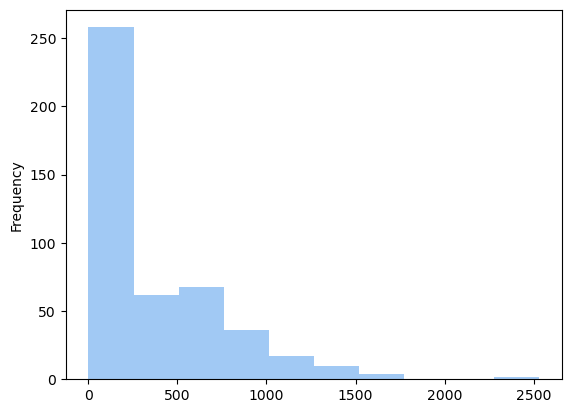

In [58]:
df['CreditScore'].value_counts().plot(kind='hist')

<Axes: ylabel='Frequency'>

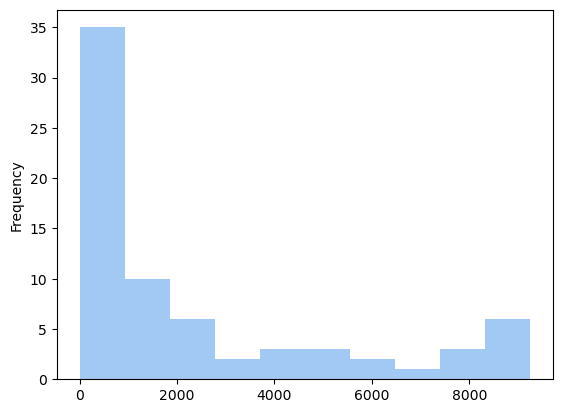

In [59]:
df['Age'].value_counts().plot(kind='hist')

In [60]:
df['Tenure'].value_counts().sort_index()

Tenure
0      5007
1     16760
2     18045
3     16630
4     17554
5     17268
6     15822
7     17810
8     17520
9     16709
10     5909
Name: count, dtype: int64

In [61]:
df['NumOfProducts'].value_counts().sort_index()

NumOfProducts
1    77374
2    84291
3     2894
4      475
Name: count, dtype: int64

In [62]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [63]:
cat_columns = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

## Find the value counts of categorical columns
for col in cat_columns:
    print("-"*100)
    print(col.upper())
    print("-"*100)
    print(df[col].value_counts().sort_index())

----------------------------------------------------------------------------------------------------
TENURE
----------------------------------------------------------------------------------------------------
Tenure
0      5007
1     16760
2     18045
3     16630
4     17554
5     17268
6     15822
7     17810
8     17520
9     16709
10     5909
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
NUMOFPRODUCTS
----------------------------------------------------------------------------------------------------
NumOfProducts
1    77374
2    84291
3     2894
4      475
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
HASCRCARD
----------------------------------------------------------------------------------------------------
HasCrCard
0.0     40606
1.0    124428
Name: count, dtype: int64
--------------------------------------------------

In [64]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [65]:
num_columns = ['CreditScore', 'Age',  'Balance',  'EstimatedSalary']
num_columns

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

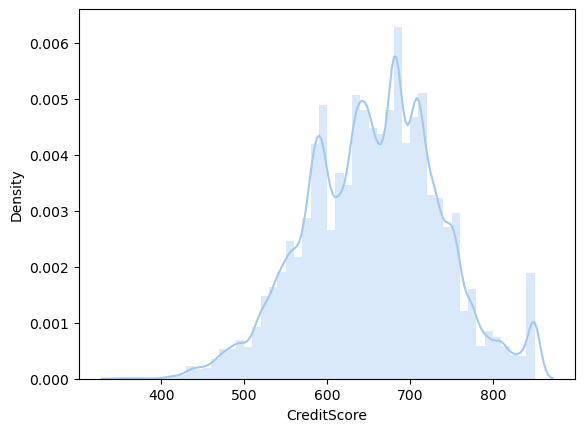

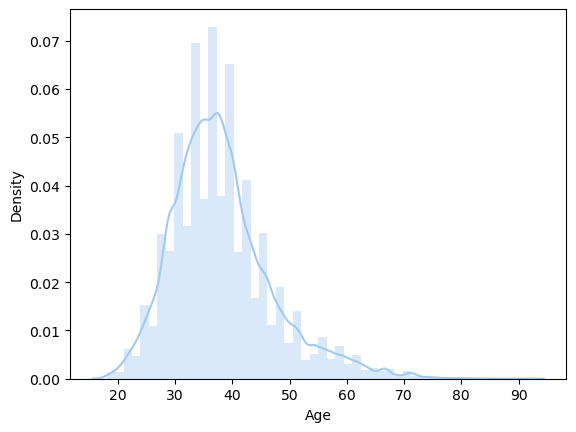

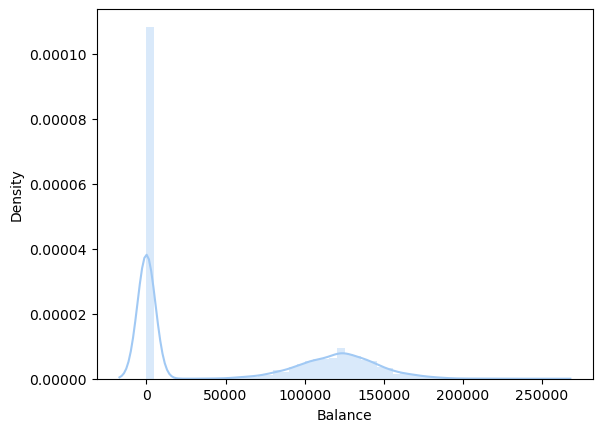

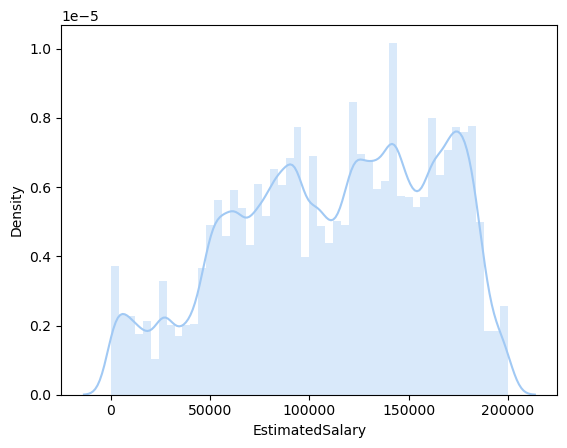

In [66]:
for col in num_columns:
    sns.distplot(df[col], kde=True)
    plt.show()

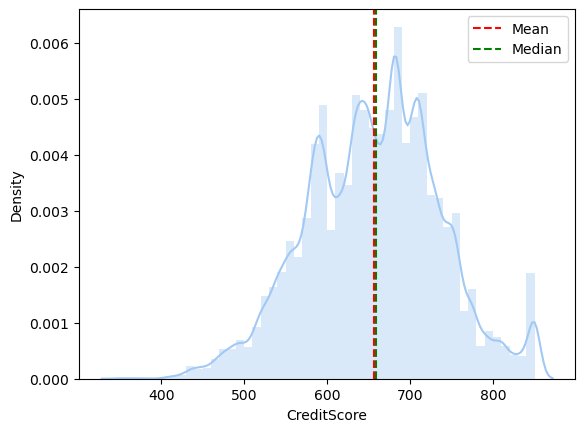

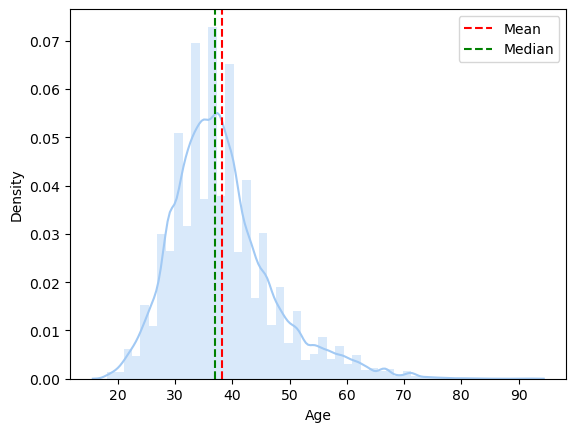

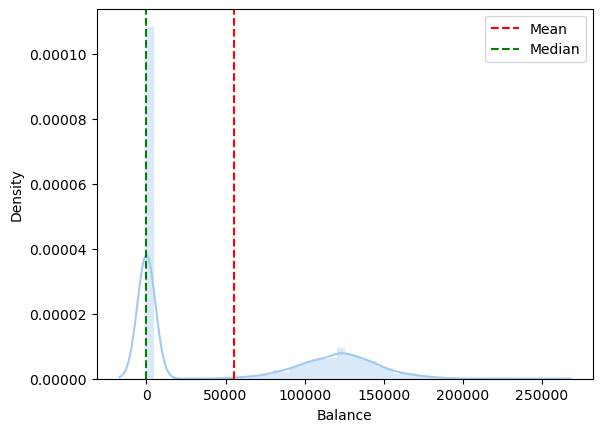

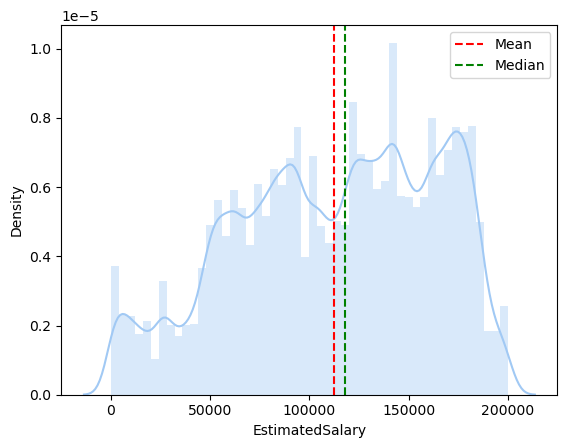

In [67]:
### Checking the mean and median distribution of the Data
for col in num_columns:
    sns.distplot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()

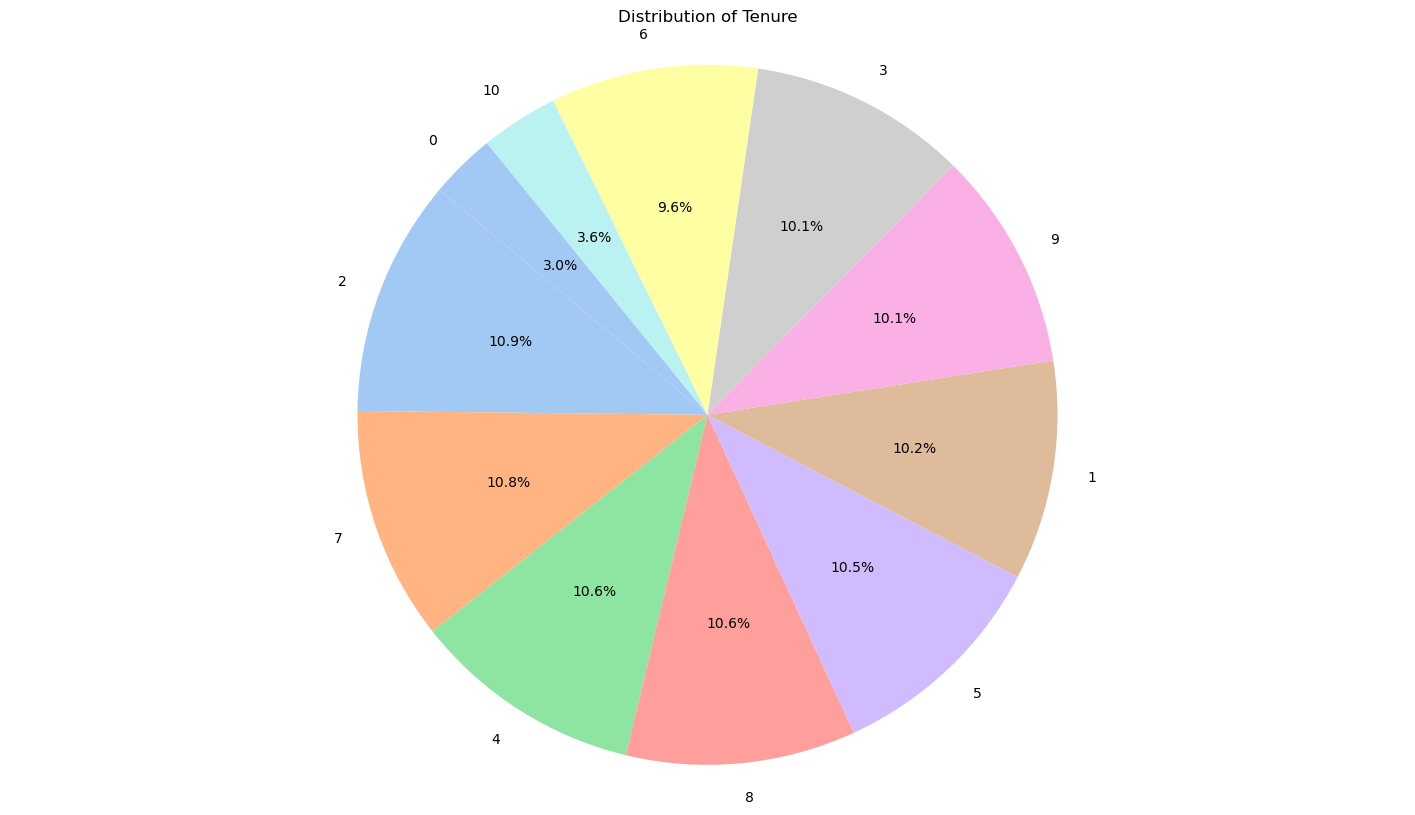

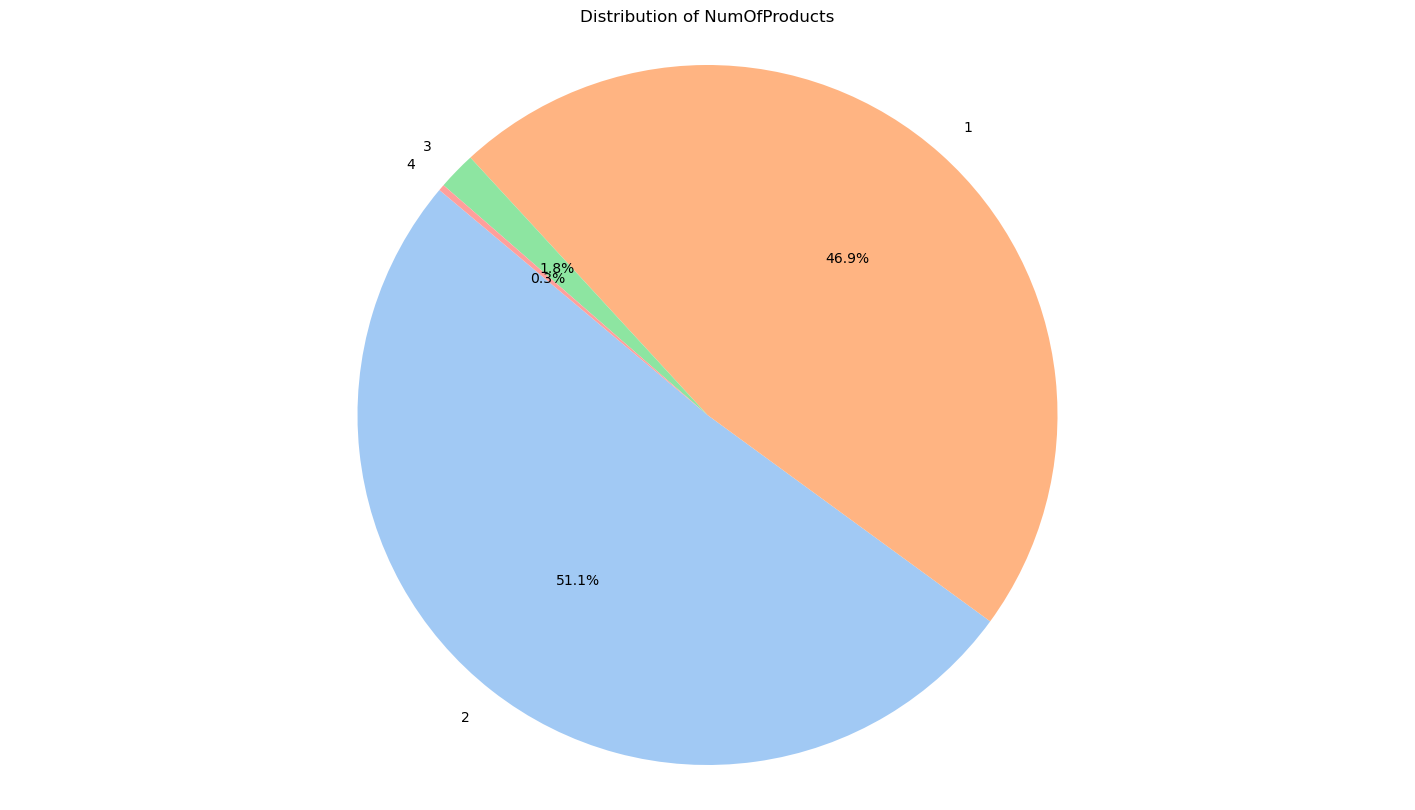

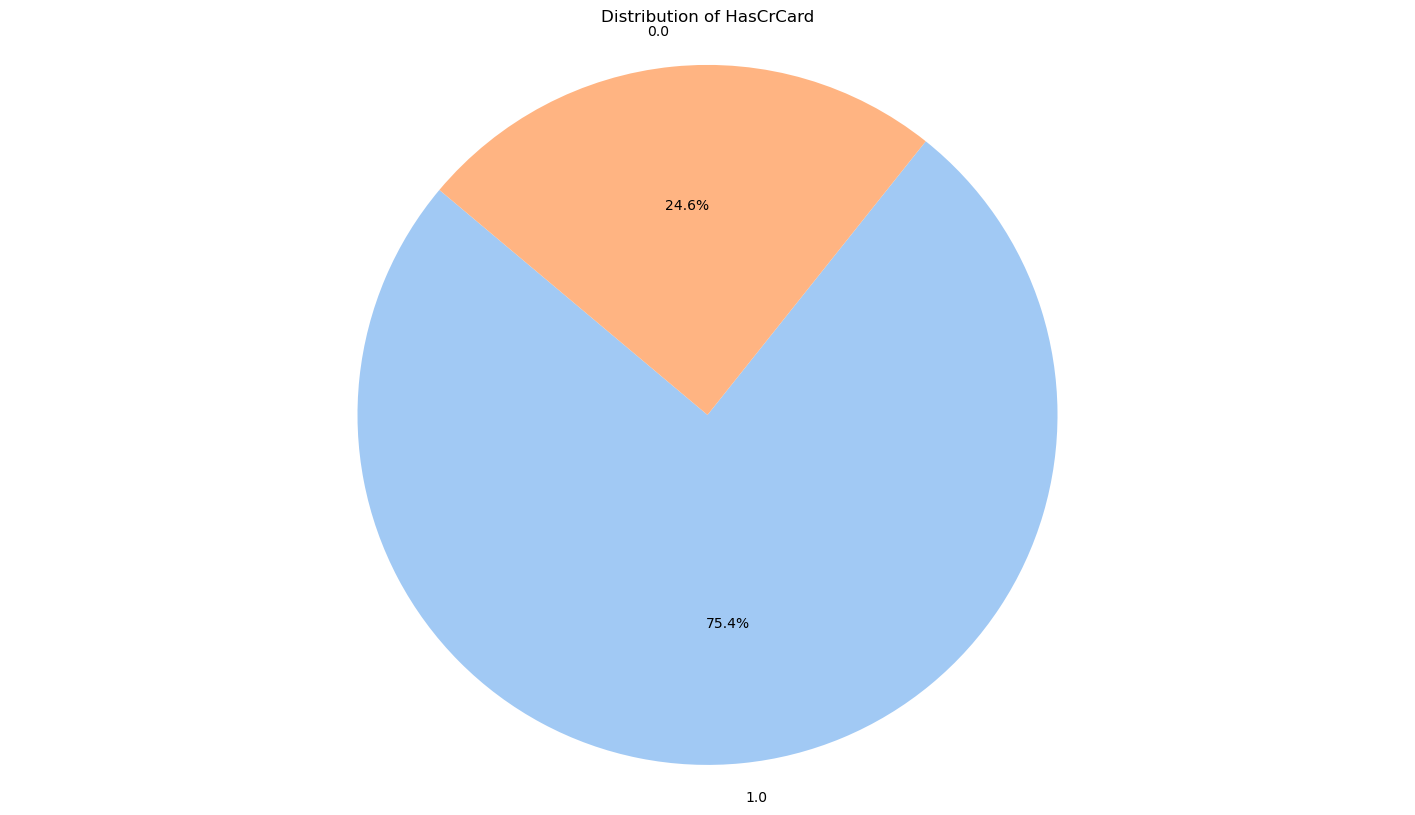

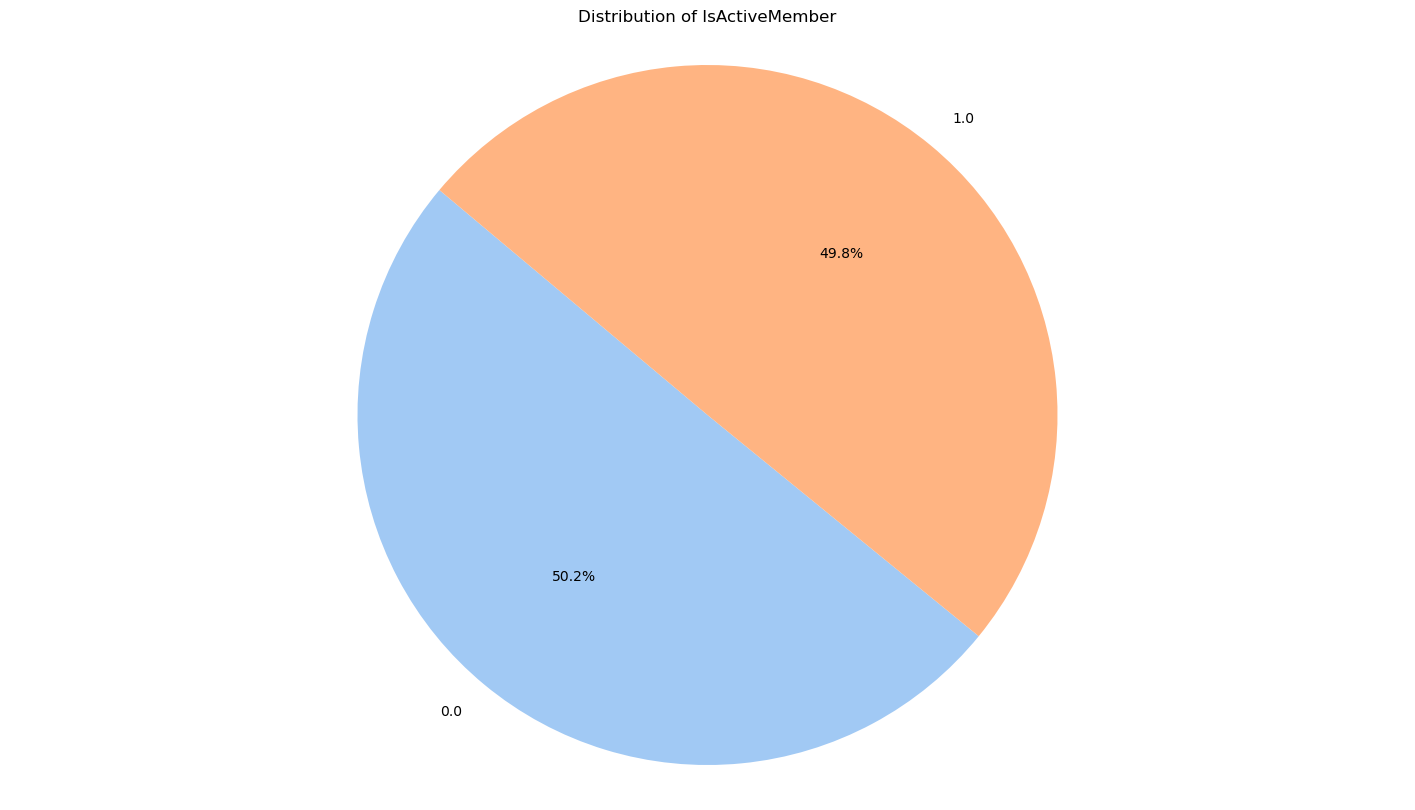

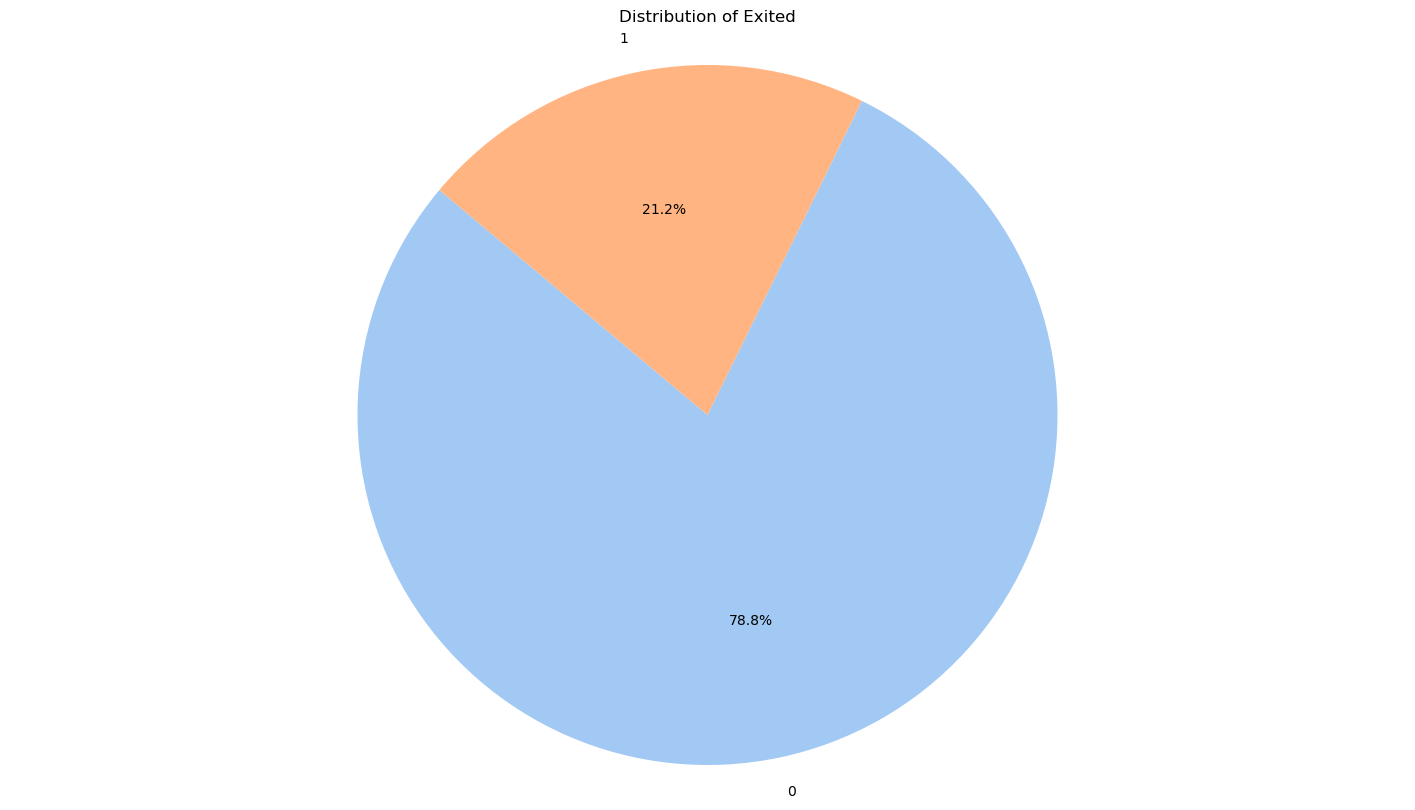

In [68]:
def create_pie_plot(data, column):
  """Creates a pie plot for a given categorical column in the data.

  Args:
    data: The pandas DataFrame containing the data.
    column: The name of the categorical column to plot.
  """

  value_counts = data[column].value_counts()
  plt.figure(figsize=(18, 10))
  plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
  plt.title(f"Distribution of {column}")
  plt.axis('equal')  # Equal aspect ratio for a circular pie chart
  plt.show()

# Assuming you have a pandas DataFrame named 'df' and a list of categorical columns named 'cat_columns'
for col in cat_columns:
  create_pie_plot(df, col)

In [69]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [70]:
cat_columns.append(['Gender', 'Geography'])

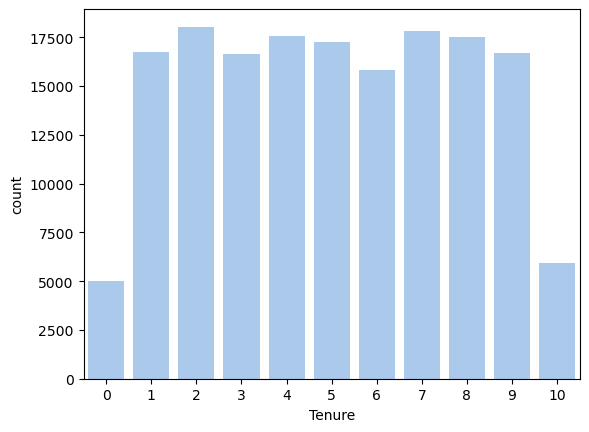

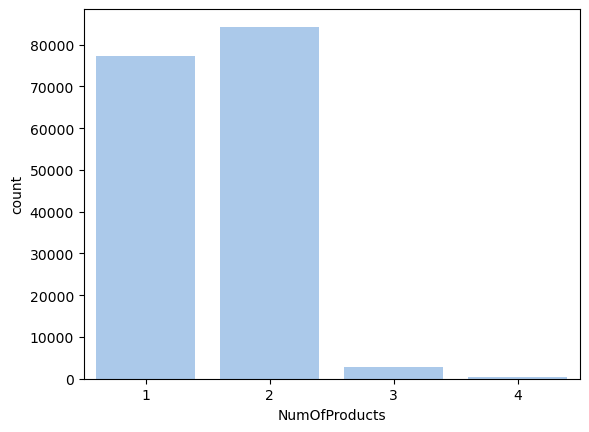

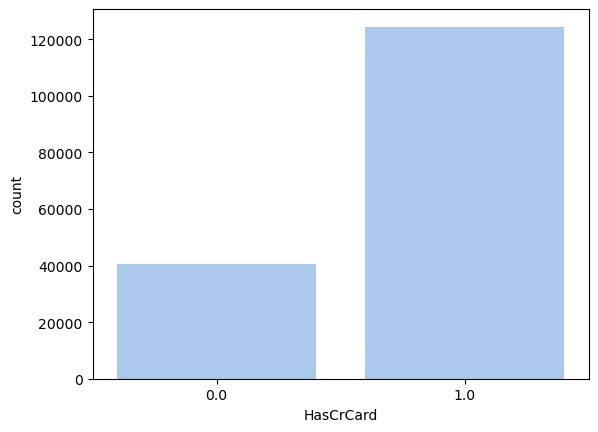

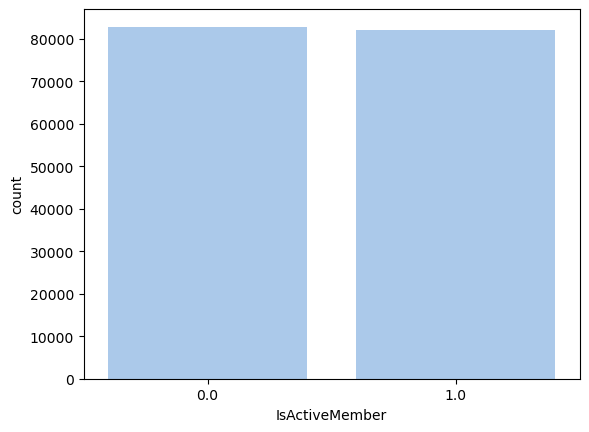

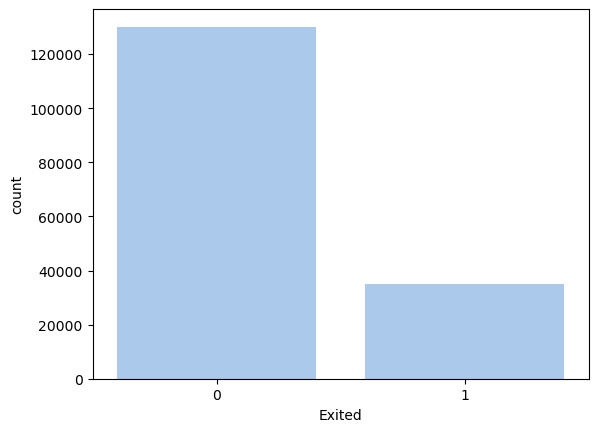

ValueError: If using all scalar values, you must pass an index

In [71]:
for col in cat_columns:
    sns.countplot(df, x=df[col])
    plt.show()

## **Feature Selection**

In [ ]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [72]:
## Dropping the un-necessary columns from the dataframe
df.drop(columns=['id', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
df.head().T

,0,1,2,3,4
CreditScore,668,627,678,581,716
Geography,France,France,France,France,Spain
Gender,Male,Male,Male,Male,Male
Age,33.0,33.0,40.0,34.0,33.0
Tenure,3,1,10,2,5
Balance,0.0,0.0,0.0,148882.54,0.0
NumOfProducts,2,2,2,1,2
HasCrCard,1.0,1.0,1.0,1.0,1.0
IsActiveMember,0.0,1.0,0.0,1.0,1.0
EstimatedSalary,181449.97,49503.5,184866.69,84560.88,15068.83


## **Modeling**

In [73]:
## Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [74]:
### Splitting the Data into X and y
X = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

In [75]:
### Splitting the Data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
import tensorflow as tf

In [80]:
### Creating Neural Network using tensorflow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer 1
    tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 2
    tf.keras.layers.Dense(8, activation='relu'), # Hidden layer 3
    
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=15)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test), 
                    callbacks=[early_stop])

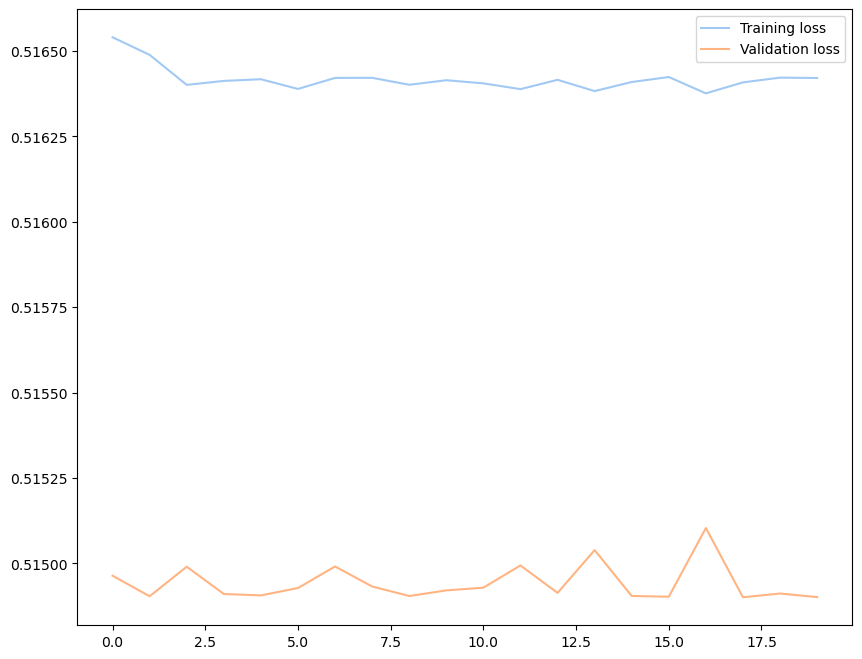

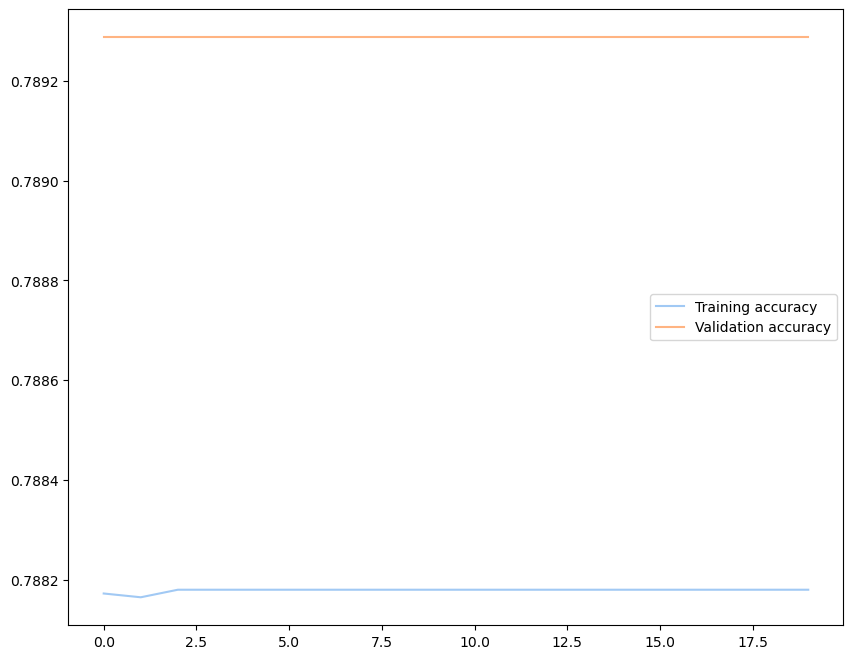

In [86]:
# plot the training and testing loss and accuracy at each epoc
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Validation accuracy')
ax.legend()
plt.show()

In [87]:
loss = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy Score: ', loss[1])

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7873 - loss: 0.5175
Accuracy Score:  0.7892871499061584


### Lets scale the data and then check the accuracy using neural network

In [89]:
X_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
149380,679,0,1,41.0,9,0.00,2,1.0,1.0,103560.98
164766,721,0,1,46.0,9,115764.32,2,1.0,0.0,102950.79


In [106]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming X_train and X_test are pandas DataFrames

columns_to_scale = ['Balance', 'EstimatedSalary', 'Age', 'CreditScore']

# Create a scaler instance
scaler = MinMaxScaler()


In [107]:
# Scale the specified columns for X_train
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
# Create a DataFrame with scaled columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns_to_scale, index=X_train.index)
# Combine scaled and unscaled columns

In [108]:
X_train_new = pd.concat([X_train_scaled_df, X_train.drop(columns_to_scale, axis=1)], axis=1)

In [109]:
# Scale the specified columns for X_test
X_test_scaled = scaler.transform(X_test[columns_to_scale])  # Use transform instead of fit_transform for test data
# Create a DataFrame with scaled columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columns_to_scale, index=X_test.index)
# Combine scaled and unscaled columns
X_test_new = pd.concat([X_test_scaled_df, X_test.drop(columns_to_scale, axis=1)], axis=1)


In [111]:
X_train_new

,Balance,EstimatedSalary,Age,CreditScore,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember
149380,0.000000,0.517796,0.310811,0.658,0,1,9,2,1.0,1.0
164766,0.461400,0.514745,0.378378,0.742,0,1,9,2,1.0,0.0
155569,0.000000,0.776989,0.229730,0.402,0,1,5,1,1.0,0.0
124304,0.230636,0.537135,0.175676,0.786,2,0,3,2,1.0,1.0
108008,0.000000,0.670561,0.135135,0.650,0,1,2,2,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
119879,0.416810,0.565403,0.364865,0.636,1,1,6,1,1.0,0.0
103694,0.000000,0.444316,0.337838,0.802,0,1,7,2,1.0,0.0
131932,0.000000,0.839890,0.283784,0.806,0,0,7,2,1.0,0.0
146867,0.000000,0.124948,0.405405,0.670,0,0,4,2,1.0,1.0


In [112]:
### Creating Neural Network using tensorflow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer 1
    tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 2
    tf.keras.layers.Dense(8, activation='relu'), # Hidden layer 3
    
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=15)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train_new, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test), 
                    callbacks=[early_stop])

Epoch 1/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8229 - loss: 0.4126 - val_accuracy: 0.7893 - val_loss: 22142.2324
Epoch 2/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8585 - loss: 0.3390 - val_accuracy: 0.7890 - val_loss: 21384.1426
Epoch 3/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8620 - loss: 0.3307 - val_accuracy: 0.7890 - val_loss: 21828.0488
Epoch 4/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8630 - loss: 0.3273 - val_accuracy: 0.7890 - val_loss: 21155.6660
Epoch 5/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8623 - loss: 0.3302 - val_accuracy: 0.7893 - val_loss: 23177.7676
Epoch 6/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.8636 - loss: 0.3259 - val_accuracy: 0.7890 - val_loss: 24076.1777
Epoch 7/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8633 - loss: 0.3270 - val_accuracy: 0.7889 - val_loss: 24373.5918
Epoch 8/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step 

In [114]:
loss = model.evaluate(X_test_new, y_test, verbose=1)
print('Accuracy Score: ', loss[1])

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8653 - loss: 0.3182
Accuracy Score:  0.8650588989257812


We have train neural network more then one time on scaled Data and without scaled Data.

The `ACCURACY` of Scaled Data is `86.6`

The `ACCURACY` of Without SCaled Data is `78.6`

## Now we are using XGBoost to check the accuracy

### First checking the result on without scaled Data

In [115]:
# !pip install xgboost -q

Accuracy score:  0.8663313842518253
Precision score:  0.8663313842518253
Recall score:  0.8663313842518253
F1 score:  0.8663313842518253


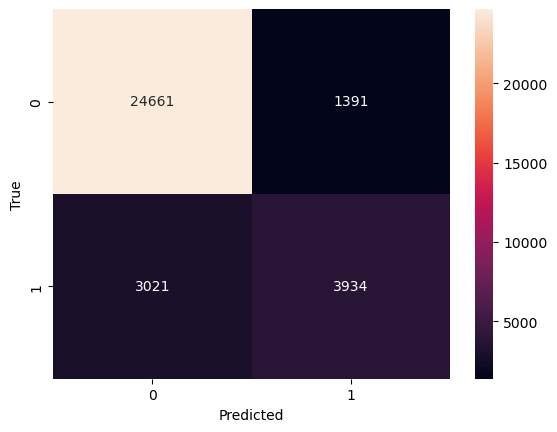

In [134]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Checking the Accuracy of the Scaled Data

Accuracy score:  0.8658466385918139
Precision score:  0.8658466385918139
Recall score:  0.8658466385918139
F1 score:  0.8658466385918139


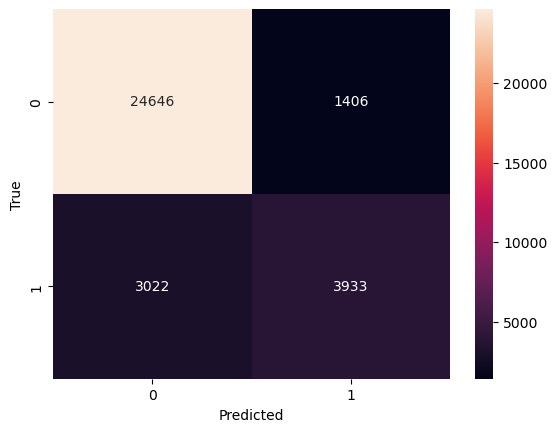

In [117]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train_new, y_train)

# predict the test data
y_pred = xgb.predict(X_test_new)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

We have train XGBoost more then one time on scaled Data and without scaled Data.

The `ACCURACY` of Scaled Data is `86.6`

The `ACCURACY` of Without SCaled Data is `86.6`

In [135]:
df_test = pd.read_csv(f"{dir}test.csv")

In [136]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical values
le = LabelEncoder()
df_test['Geography'] = le.fit_transform(df_test['Geography'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])

In [137]:
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58


In [138]:
df_test.drop(columns=['id', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [139]:
y_pred = xgb.predict_proba(df_test)

In [140]:
submission = pd.read_csv(f'{dir}sample_submission.csv')
submission['Exited'] = y_pred[:, 1]
submission.to_csv('submission.csv', index=False)